In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical testing and modeling
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [19]:

# Mount Google Drive (optional, if datasets are stored in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Load datasets (assuming datasets are uploaded to Colab)
rmp_num_df = pd.read_csv('/content/rmpCapstoneNum.csv')
rmp_qual_df = pd.read_csv('/content/rmpCapstoneQual.csv')
rmp_tags_df = pd.read_csv('/content/rmpCapstoneTags.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Rename columns for clarity in rmpCapstoneNum.csv
rmp_num_df.columns = [
    'Average_Rating', 'Average_Difficulty', 'Num_Ratings', 'Pepper',
    'Take_Class_Again', 'Online_Ratings', 'Male', 'Female'
]

# Rename columns in rmpCapstoneQual.csv
rmp_qual_df.columns = ['Major', 'University', 'State']

# Rename columns in rmpCapstoneTags.csv
rmp_tags_df.columns = [
    'Tough_Grader', 'Good_Feedback', 'Respected', 'Lots_to_Read',
    'Participation_Matters', 'Dont_Skip_Class', 'Lots_of_Homework', 'Inspirational',
    'Pop_Quizzes', 'Accessible', 'So_Many_Papers', 'Clear_Grading',
    'Hilarious', 'Test_Heavy', 'Graded_by_Few', 'Amazing_Lectures',
    'Caring', 'Extra_Credit', 'Group_Projects', 'Lecture_Heavy'
]

# Cheaking shape
print(rmp_num_df.shape)


(89892, 8)


In [43]:
# Extract required columns using actual names
avg_rating = pd.to_numeric(rmp_num_df['Average_Rating'], errors='coerce')
num_ratings = pd.to_numeric(rmp_num_df['Num_Ratings'], errors='coerce')
male = pd.to_numeric(rmp_num_df['Male'], errors='coerce')
female = pd.to_numeric(rmp_num_df['Female'], errors='coerce')

# Handle missing values
valid_rows = ~avg_rating.isna()
avg_rating = avg_rating[valid_rows]
num_ratings = num_ratings[valid_rows]
male = male[valid_rows]
female = female[valid_rows]




In [49]:
# Count missing values before handling
missing_avg_rating_before = rmp_num_df['Average_Rating'].isna().sum()
missing_num_ratings_before = rmp_num_df['Num_Ratings'].isna().sum()

print(f"Missing values in 'Average_Rating' before handling: {missing_avg_rating_before}")
print(f"Missing values in 'Num_Ratings' before handling: {missing_num_ratings_before}")

# Count missing values after handling
missing_avg_rating_after = avg_rating.isna().sum()
missing_num_ratings_after = num_ratings.isna().sum()

print(f"Missing values in 'avg_rating' after handling: {missing_avg_rating_after}")
print(f"Missing values in 'num_ratings' after handling: {missing_num_ratings_after}")

print(rmp_num_df.columns)


Missing values in 'Average_Rating' before handling: 19889
Missing values in 'Num_Ratings' before handling: 19889
Missing values in 'avg_rating' after handling: 0
Missing values in 'num_ratings' after handling: 0
Index(['Average_Rating', 'Average_Difficulty', 'Num_Ratings', 'Pepper',
       'Take_Class_Again', 'Online_Ratings', 'Male', 'Female'],
      dtype='object')


In [45]:
# Normalize the number of ratings using a log scale
max_ratings = num_ratings.max()
Weight = np.log1p(num_ratings) / np.log1p(max_ratings)

# Compute adjusted ratings
Adjusted_rating = avg_rating * Weight

In [26]:
# Filter adjusted ratings by gender
male_ratings = Adjusted_rating[(male == 1) & (female == 0)]
female_ratings = Adjusted_rating[(male == 0) & (female == 1)]

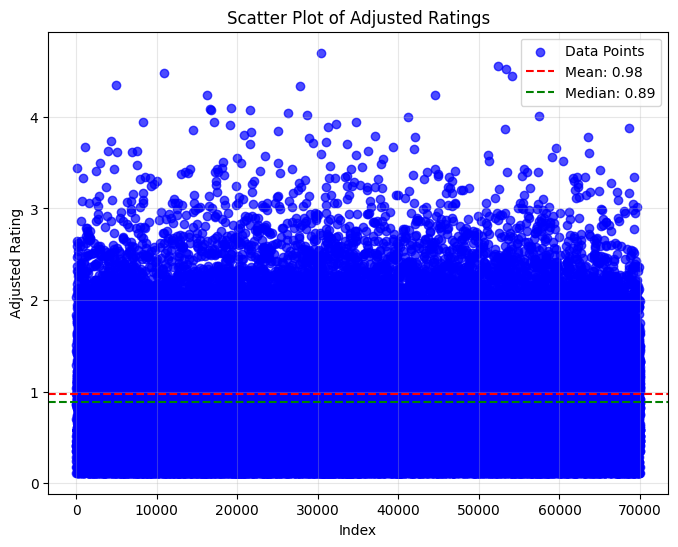

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter(data, title="Scatter Plot", xlabel="Index", ylabel="Value"):
    """
    Plots a scatter plot for the given data.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(data)), data, alpha=0.7, color="blue", label="Data Points")

    # Add mean and median
    mean_val = np.mean(data)
    median_val = np.median(data)
    plt.axhline(mean_val, color="red", linestyle="--", linewidth=1.5, label=f"Mean: {mean_val:.2f}")
    plt.axhline(median_val, color="green", linestyle="--", linewidth=1.5, label=f"Median: {median_val:.2f}")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Scatter plot for adjusted ratings
plot_scatter(Adjusted_rating, title="Scatter Plot of Adjusted Ratings", xlabel="Index", ylabel="Adjusted Rating")

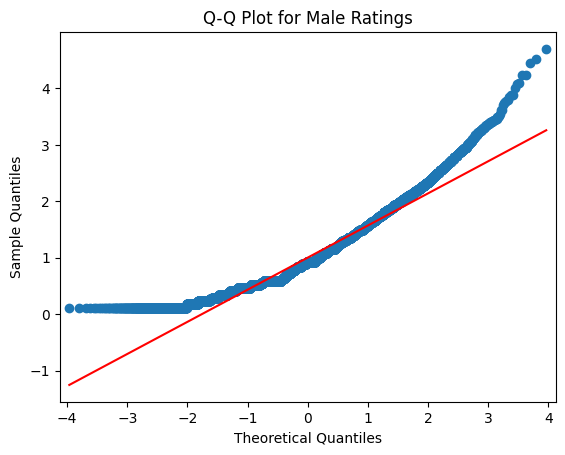

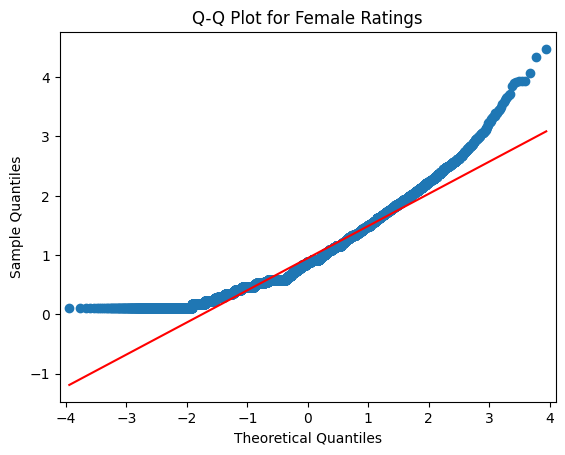

In [28]:
import statsmodels.api as sm

# Q-Q plot for male ratings
sm.qqplot(male_ratings, line='s')
plt.title("Q-Q Plot for Male Ratings")
plt.show()

# Q-Q plot for female ratings
sm.qqplot(female_ratings, line='s')
plt.title("Q-Q Plot for Female Ratings")
plt.show()

In [29]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
mannwhitu_e = mannwhitneyu(male_ratings, female_ratings, alternative='greater')
print(f"Mann-Whitney U Test p-value: {mannwhitu_e.pvalue}")

Mann-Whitney U Test p-value: 5.0802170449190274e-23


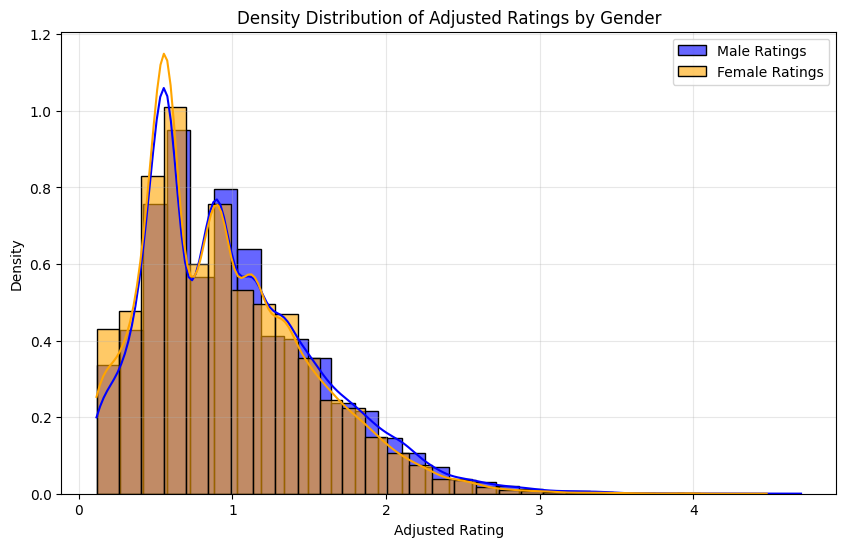

<ipython-input-62-2a8d1518da84>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ratings_data, x='Gender', y='Adjusted Rating', palette='coolwarm')


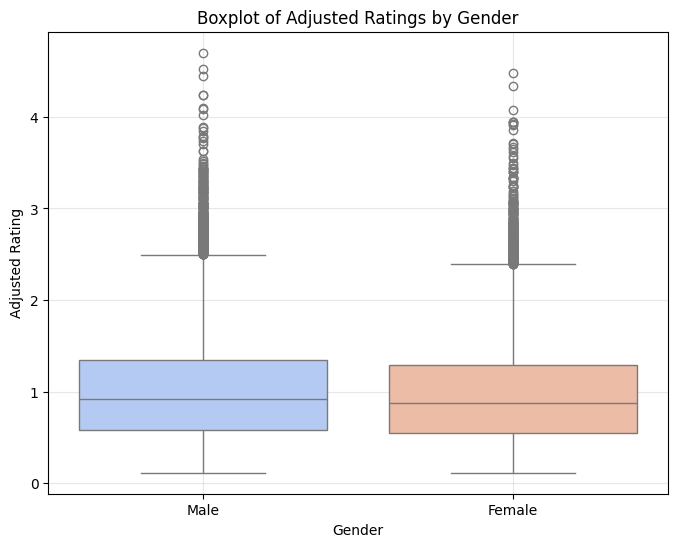

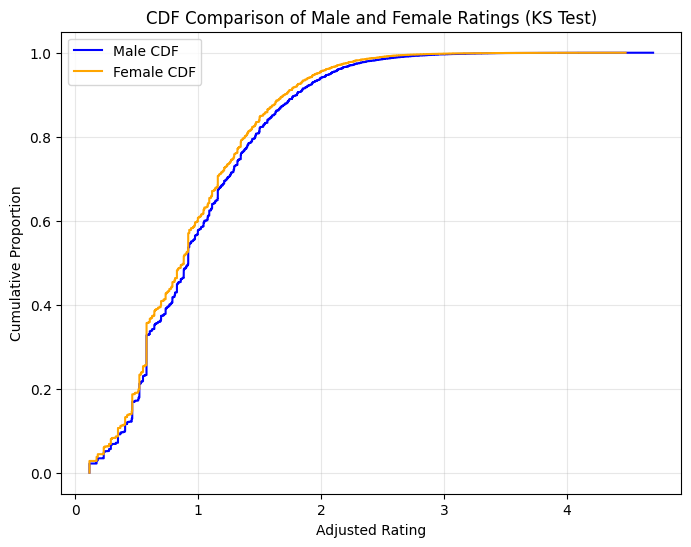

In [62]:
#Question 2
# We will be doing both the tests KS and Levene's
# first we will see some distributions
# Visualization 1: Density Distribution
plt.figure(figsize=(10, 6))
sns.histplot(male_ratings, bins=30, color='blue', label='Male Ratings', kde=True, stat="density", alpha=0.6)
sns.histplot(female_ratings, bins=30, color='orange', label='Female Ratings', kde=True, stat="density", alpha=0.6)
plt.title('Density Distribution of Adjusted Ratings by Gender')
plt.xlabel('Adjusted Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualization 2: Boxplot for Variance Comparison
ratings_data = pd.DataFrame({
    'Adjusted Rating': pd.concat([male_ratings, female_ratings]),
    'Gender': ['Male'] * len(male_ratings) + ['Female'] * len(female_ratings)
})

plt.figure(figsize=(8, 6))
sns.boxplot(data=ratings_data, x='Gender', y='Adjusted Rating', palette='coolwarm')
plt.title('Boxplot of Adjusted Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Adjusted Rating')
plt.grid(alpha=0.3)
plt.show()

# Visualization 3: CDF Comparison for KS Test
male_cdf = male_ratings.sort_values().reset_index(drop=True)
female_cdf = female_ratings.sort_values().reset_index(drop=True)
plt.figure(figsize=(8, 6))
plt.step(male_cdf, np.arange(1, len(male_cdf) + 1) / len(male_cdf), label='Male CDF', color='blue')
plt.step(female_cdf, np.arange(1, len(female_cdf) + 1) / len(female_cdf), label='Female CDF', color='orange')
plt.title('CDF Comparison of Male and Female Ratings (KS Test)')
plt.xlabel('Adjusted Rating')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [55]:
#KS test
from scipy.stats import ks_2samp

# KS Test
ks_stat, ks_p_value = ks_2samp(male_ratings, female_ratings)

print(f"KS Test Statistic: {ks_stat}")
print(f"KS Test p-value: {ks_p_value}")

KS Test Statistic: 0.03772919022132848
KS Test p-value: 1.637499327136132e-16


In [57]:
#leven's test
from scipy.stats import levene

# Levene's Test
levene_stat, levene_p_value = levene(male_ratings, female_ratings)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"Levene's Test p-value: {levene_p_value}")

Levene's Test Statistic: 35.13333097319043
Levene's Test p-value: 3.0981750536204564e-09


#Question 3:



Cohen's d (Effect Size): 0.095
95% Confidence Interval for Cohen's d: [0.077, 0.112]


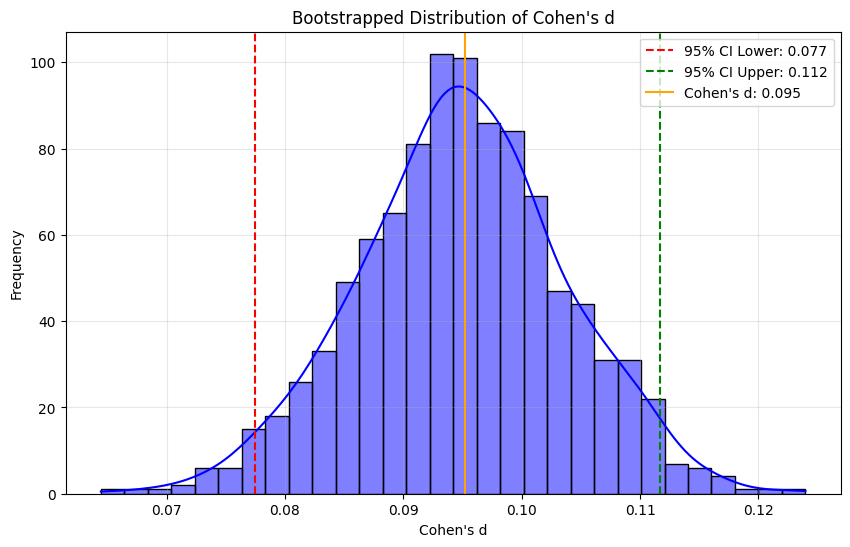

In [67]:
import numpy as np

# Compute Cohen's d
n_male, n_female = len(male_ratings), len(female_ratings)
male_mean, female_mean = male_ratings.mean(), female_ratings.mean()
male_var, female_var = male_ratings.var(ddof=1), female_ratings.var(ddof=1)

pooled_std = np.sqrt(((n_male - 1) * male_var + (n_female - 1) * female_var) / (n_male + n_female - 2))
cohen_d = (male_mean - female_mean) / pooled_std

print(f"Cohen's d (Effect Size): {cohen_d:.3f}")

# Bootstrap for confidence interval
np.random.seed(42)
n_bootstrap = 1000
bootstrap_d = []

for _ in range(n_bootstrap):
    male_sample = np.random.choice(male_ratings, size=n_male, replace=True)
    female_sample = np.random.choice(female_ratings, size=n_female, replace=True)

    # Recompute pooled standard deviation
    pooled_std_sample = np.sqrt(
        (((len(male_sample) - 1) * male_sample.var(ddof=1)) + ((len(female_sample) - 1) * female_sample.var(ddof=1)))
        / (len(male_sample) + len(female_sample) - 2)
    )
    # Compute Cohen's d for the bootstrap sample
    d_sample = (male_sample.mean() - female_sample.mean()) / pooled_std_sample
    bootstrap_d.append(d_sample)

# Confidence interval
ci_lower = np.percentile(bootstrap_d, 2.5)
ci_upper = np.percentile(bootstrap_d, 97.5)

print(f"95% Confidence Interval for Cohen's d: [{ci_lower:.3f}, {ci_upper:.3f}]")

#visualizations
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_d, kde=True, color='blue', bins=30)
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI Lower: {ci_lower:.3f}')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'95% CI Upper: {ci_upper:.3f}')
plt.axvline(cohen_d, color='orange', linestyle='-', label=f'Cohen\'s d: {cohen_d:.3f}')
plt.title('Bootstrapped Distribution of Cohen\'s d')
plt.xlabel('Cohen\'s d')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Variance Ratio (Gender Bias in Spread): 1.103
95% Confidence Interval: [1.076, 1.130]
